In [1]:
from algorithm_ranking import MeasurementsSimulator, MeasurementsVisualizer, MeasurementsManager, RankVariantsSort2

In [2]:
import pandas as pd
import numpy as np

### Experiment 1

In [3]:
cfg = {}
cfg['alg1']  = [0.2,0.02] #[mean, std]
cfg['alg2']  = [0.2,0.01]
cfg['alg3']  = [0.2,0.01]
cfg['alg4']  = [0.18,0.01]
h0 = list(cfg.keys())
h0

['alg1', 'alg2', 'alg3', 'alg4']

In [4]:
ms = MeasurementsSimulator(cfg, 'normal',seed=159) 
ms.measure(10,1)

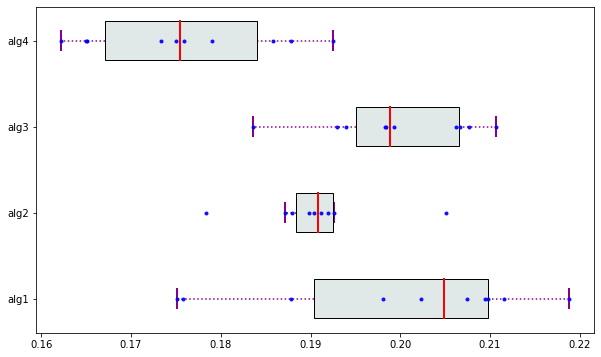

In [5]:
mv = MeasurementsVisualizer(ms.get_alg_measurements(), h0)
fig = mv.show_measurements_boxplots()

In [6]:
rv = RankVariantsSort2(ms.get_alg_measurements(), h0)
h0

['alg1', 'alg2', 'alg3', 'alg4']

In [7]:
rv.rank_variants(debug=True)

['alg1', 'alg2', 'alg3', 'alg4']
[0 1 2 3]


compare alg1 and alg2
['alg1', 'alg2', 'alg3', 'alg4']
[0 0 1 2]


compare alg2 and alg3
['alg1', 'alg2', 'alg3', 'alg4']
[0 0 1 2]


compare alg4 and alg3
['alg1', 'alg2', 'alg4', 'alg3']
[0 0 1 2]


compare alg1 and alg2
['alg1', 'alg2', 'alg4', 'alg3']
[0 0 1 2]


compare alg4 and alg2
['alg1', 'alg4', 'alg2', 'alg3']
[0 0 1 2]


compare alg4 and alg1
['alg4', 'alg1', 'alg2', 'alg3']
[0 1 1 2]




,case:concept:name,case:rank:q75-q25
0,alg4,0
1,alg1,1
2,alg2,1
3,alg3,2


In [8]:
rv.compare_algs.num_comparisons

5

### Experiment 2

In [9]:
cfg = {}
cfg['alg1']  = [0.2,0.02] # [mean, std]
cfg['alg2']  = [0.2,0.01]
cfg['alg3']  = [0.2,0.01]
cfg['alg4']  = [0.19,0.01]
ms = MeasurementsSimulator(cfg, 'normal',seed=129)    
rep_steps = 20
run_id= 1
ms.measure(rep_steps=rep_steps, run_id=run_id)

In [10]:
h0 = list(cfg.keys())
h0

['alg1', 'alg2', 'alg3', 'alg4']

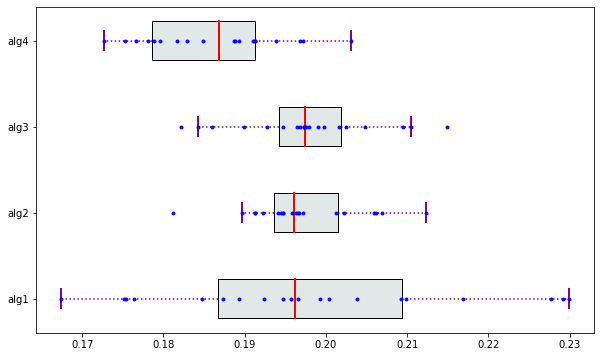

In [11]:
mv = MeasurementsVisualizer(ms.get_alg_measurements(), h0)
fig = mv.show_measurements_boxplots()

In [12]:
rv = RankVariantsSort2(ms.get_alg_measurements(), h0)

In [13]:
rv.rank_variants(debug=True)

['alg1', 'alg2', 'alg3', 'alg4']
[0 1 2 3]


compare alg1 and alg2
['alg1', 'alg2', 'alg3', 'alg4']
[0 0 1 2]


compare alg2 and alg3
['alg1', 'alg2', 'alg3', 'alg4']
[0 0 0 1]


compare alg4 and alg3
['alg1', 'alg2', 'alg4', 'alg3']
[0 0 0 1]


compare alg1 and alg2
['alg1', 'alg2', 'alg4', 'alg3']
[0 0 0 1]


compare alg4 and alg2
['alg1', 'alg4', 'alg2', 'alg3']
[0 0 1 1]


compare alg1 and alg4
['alg1', 'alg4', 'alg2', 'alg3']
[0 0 1 1]




,case:concept:name,case:rank:q75-q25
0,alg1,0
1,alg4,0
2,alg2,1
3,alg3,1


In [14]:
rv.compare_algs.num_comparisons

5

In [15]:
cfg = {}
cfg['alg1']  = [0.1,0.01] # [mean, std]
cfg['alg2']  = [0.1,0.01]
cfg['alg3']  = [0.15,0.1]
cfg['alg4']  = [0.17,0.01]
cfg['alg5']  = [0.17,0.01]
ms = MeasurementsSimulator(cfg, 'normal',seed=129)    
rep_steps = 20
run_id= 1
ms.measure(rep_steps=rep_steps, run_id=run_id)
h0 = list(cfg.keys())

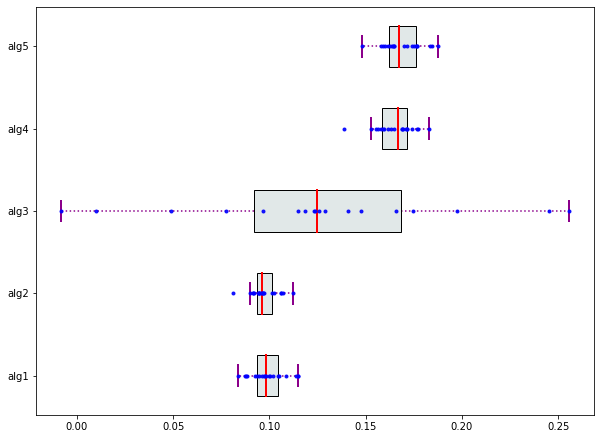

In [16]:
mv = MeasurementsVisualizer(ms.get_alg_measurements(), h0)
fig = mv.show_measurements_boxplots()

In [17]:
rv = RankVariantsSort2(ms.get_alg_measurements(), h0)

In [18]:
rv.rank_variants()

,case:concept:name,case:rank:q75-q25
0,alg1,0
1,alg2,0
2,alg3,0
3,alg4,0
4,alg5,0


In [19]:
rv.compare_algs.num_comparisons

4

In [20]:
#df = pd.DataFrame(ms.alg_measurements).T

### Fix: Sort by IQR

In [21]:
algs = []
iqrs = []
for k,v in ms.alg_measurements.items():
    algs.append(k)
    q75,q25 = np.percentile(v,[75,25])
    iqrs.append(q75-q25)
df = pd.DataFrame({"algs":algs,"iqr":iqrs})
df = df.sort_values(by=['iqr'],ascending=False)
df

,algs,iqr
2,alg3,0.076122
4,alg5,0.013971
3,alg4,0.012610
0,alg1,0.011360
1,alg2,0.007940


In [22]:
h0_ = df['algs'].tolist()
h0_

['alg3', 'alg5', 'alg4', 'alg1', 'alg2']

In [23]:
rv = RankVariantsSort2(ms.get_alg_measurements(), h0)
rv.sort_h0_by_iqr()

,algs,iqr
2,alg3,0.076122
4,alg5,0.013971
3,alg4,0.012610
0,alg1,0.011360
1,alg2,0.007940


In [24]:
rv.rank_variants(debug=True)

['alg3', 'alg5', 'alg4', 'alg1', 'alg2']
[0 1 2 3 4]


compare alg3 and alg5
['alg3', 'alg5', 'alg4', 'alg1', 'alg2']
[0 0 1 2 3]


compare alg5 and alg4
['alg3', 'alg5', 'alg4', 'alg1', 'alg2']
[0 0 0 1 2]


compare alg1 and alg4
['alg3', 'alg5', 'alg1', 'alg4', 'alg2']
[0 0 0 1 2]


compare alg2 and alg4
['alg3', 'alg5', 'alg1', 'alg2', 'alg4']
[0 0 0 1 2]


compare alg3 and alg5
['alg3', 'alg5', 'alg1', 'alg2', 'alg4']
[0 0 0 1 2]


compare alg1 and alg5
['alg3', 'alg1', 'alg5', 'alg2', 'alg4']
[0 0 1 1 2]


compare alg2 and alg5
['alg3', 'alg1', 'alg2', 'alg5', 'alg4']
[0 0 1 2 2]


compare alg3 and alg1
['alg3', 'alg1', 'alg2', 'alg5', 'alg4']
[0 0 1 2 2]


compare alg1 and alg2
['alg3', 'alg1', 'alg2', 'alg5', 'alg4']
[0 0 0 1 1]


compare alg3 and alg1
['alg3', 'alg1', 'alg2', 'alg5', 'alg4']
[0 0 0 1 1]




,case:concept:name,case:rank:q75-q25
0,alg3,0
1,alg1,0
2,alg2,0
3,alg5,1
4,alg4,1


In [25]:
rv.compare_algs.num_comparisons

8

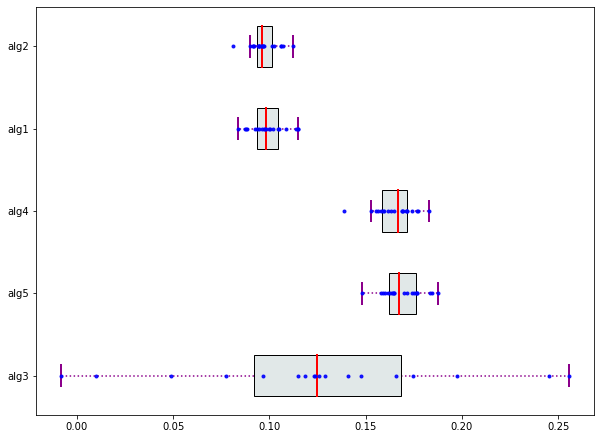

In [26]:
fig = mv.show_measurements_boxplots(rv.alg_seq_h0)